In [57]:
import requests
from tqdm import tqdm
from os.path import join as oj
import tables, numpy
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage import data
import pickle as pkl
from skimage.util import img_as_float
import h5py
from copy import deepcopy
from skimage.filters import gabor_kernel
import gabor_feats
from scipy.io import loadmat
import seaborn as sns
import pandas as pd
out_dir = '/scratch/users/vision/data/gallant/vim_2_crcns'

# look at model fits

In [48]:
rois = ['v1lh', 'v1rh', 'v2lh', 'v2rh', 'v4lh', 'v4rh']
save_dir = oj(out_dir, 'feats4')
fnames = sorted([fname for fname in os.listdir(save_dir)])
results_list = [pd.Series(pkl.load(open(oj(save_dir, fname), "rb"))) for fname in tqdm(fnames) ]
results = pd.concat(results_list, axis=1).T.infer_objects()
results['region'] = results['roi'].str.slice(0, 2)
r = results.drop('model', axis=1) # drop model to speed things up

100%|██████████| 136/136 [00:00<00:00, 1220.04it/s]


In [49]:
r.head()

roi     term1        term2         term3       term4  complexity1  \
0  v4lh -0.009626  2010.932414  10511.201640  132.604408  2010.922788   
1  v4lh -0.005679  1893.165397  10131.350250  154.417838  1893.159717   
2  v4lh -0.005030  1855.236310   9959.970021  145.990644  1855.231280   
3  v4lh -0.002234  2028.926861  10751.968274  135.751596  2028.924627   
4  v4lh -0.004073  1995.776274  10589.796537  131.828557  1995.772202   

    complexity2  num_train  num_test     d       mse        r2      corr  \
0  10643.796422       7200       540  1280  1.089105 -0.089105  0.022833   
1  10285.762409       7200       540  1280  1.058387 -0.058387  0.033025   
2  10105.955636       7200       540  1280  1.090621 -0.090621 -0.028857   
3  10887.717636       7200       540  1280  1.065223 -0.065223  0.055382   
4  10721.621021       7200       540  1280  1.041468 -0.041468  0.076985   

     idx region  
0  13169     v4  
1  13170     v4  
2  13171     v4  
3  13233     v4  
4  13234     v4

In [ ]:
# plt.figure(dpi=200)
# f, axes = plt.subplots(1, 3, figsize=(7, 3), sharex=True)
# R, C = 1, 3
# plt.subplot(R, C, 1)
sns.catplot(x="region", y="mse", data=r, kind='box', order=['v1', 'v2', 'v4']) #, ax=axes[0]) #, order=["No", "Yes"], data=tips);
sns.catplot(x="region", y="corr", data=r, kind='box', order=['v1', 'v2', 'v4']) #, ax=axes[0]) #, order=["No", "Yes"], data=tips);
# sns.catplot(x="region", y="r2", data=r, kind='box', order=['v1', 'v2', 'v4']) #, ax=axes[1]) #, order=["No", "Yes"], data=tips);
sns.catplot(x="region", y="complexity1", data=r, kind='box', order=['v1', 'v2', 'v4']) #, ax=axes[1]) #, order=["No", "Yes"], data=tips);
plt.yscale('log')
sns.catplot(x="region", y="complexity2", data=r, kind='box', order=['v1', 'v2', 'v4']) #, ax=axes[1]) #, order=["No", "Yes"], data=tips);
plt.yscale('log')
# plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
R, C = 1, 2
plt.subplot(R, C, 1)
plt.plot(r['complexity1'], r['mse'], 'o')
plt.xlabel('complexity1')
# plt.xscale('log')
# sns.lmplot(x="complexity1", y="mse", data=result)
plt.ylabel('test mse')
plt.show()

In [23]:
vol = np.zeros(73728)

# pycortex

In [37]:
import nibabel as nib
import cortex
from cortex import surfs


img = nib.load(anat_file)
im_np = np.array(img.get_fdata())
im_np.shape

anat_file = oj(out_dir, 'anatomy/S1_anatomy.nii')
ret_file = 'S1_retinotopy.hdf'
ds = cortex.load(ret_file)

In [ ]:
im = cortex.quickshow((np.random.randn(31, 100, 100), "S1", "fullhead"))

In [ ]:
cortex.webshow(ds)

In [ ]:
dv = cortex.Volume(anat_file, "S1", "fullhead")

In [ ]:
cortex.quickshow(im_np, "S1", "fullhead")

In [ ]:
cortex.webshow(img)

In [ ]:
ds = cortex.load("S1_retinotopy.hdf")

In [40]:
!h5ls S1_retinotopy.hdf

/bin/sh: 1: h5ls: not found


In [ ]:
cortex.webshow(cortex.Volume.random("S1", "fullhead"))

In [ ]:
pts, poly = surfs.getSurf("AH", "fiducial", merge=True)

# nilearn plotting

In [40]:
x = np.random.randn(64, 64, 18)

In [41]:
from nilearn import plotting, datasets

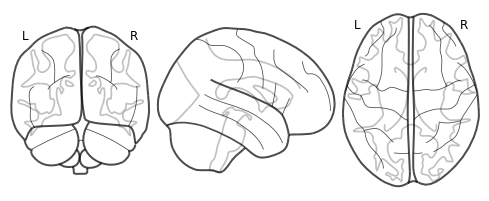

In [44]:
plotting.plot_glass_brain(None) #, annotate=False, black_bg=True)

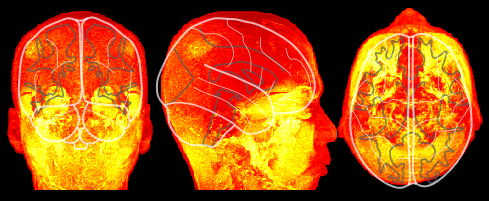

In [32]:
plotting.plot_glass_brain(anat_file, annotate=False, black_bg=True)

In [56]:
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]
# stat_img is just the name of the file that we downloded
stat_img


Dataset created in /accounts/projects/vision/nilearn_data/neurovault



'/accounts/projects/vision/nilearn_data/neurovault/collection_658/image_10426.nii.gz'

In [58]:
stat_img

'/accounts/projects/vision/nilearn_data/neurovault/collection_658/image_10426.nii.gz'